In [1]:
import os
import time
import sys
import json
import numpy as np
import torch as th
import matplotlib.pyplot as plt
import motornet as mn
from simple_policy import Policy
from simple_task import CentreOutFF
from simple_utils import *

print('All packages imported.')
print('pytorch version: ' + th.__version__)
print('numpy version: ' + np.__version__)
print('motornet version: ' + mn.__version__)

All packages imported.
pytorch version: 2.2.0.dev20231105
numpy version: 1.24.1
motornet version: 0.2.0


In [2]:
model_name = "jerk_2_200/jerk_2_200"

dict_keys(['overall', 'position', 'muscle', 'muscle_derivative', 'hidden', 'hidden_derivative', 'jerk'])


/Users/plg/venvs/motorchnet/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


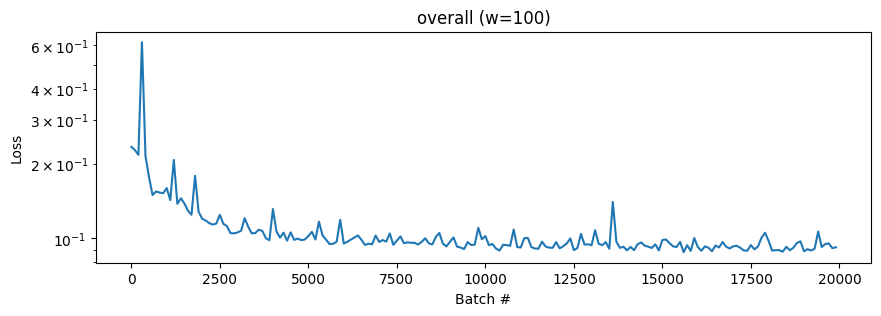

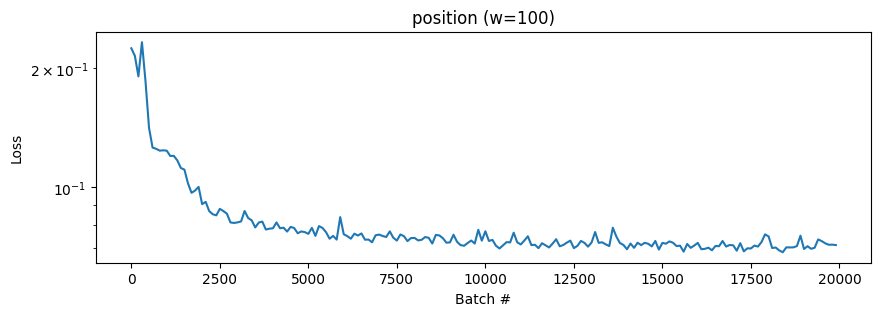

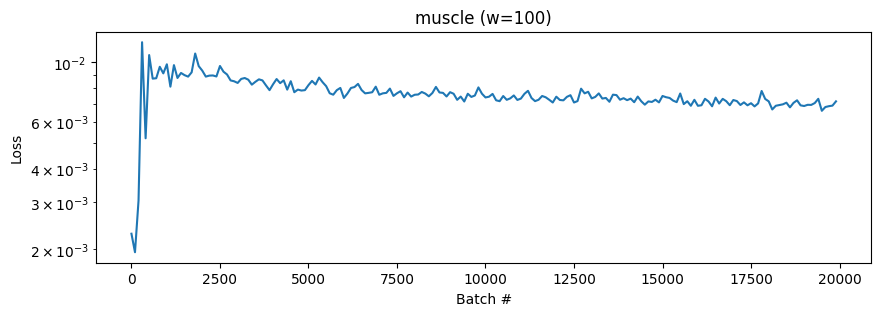

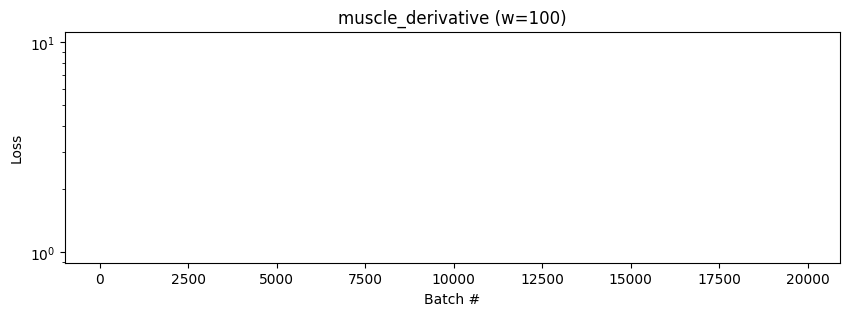

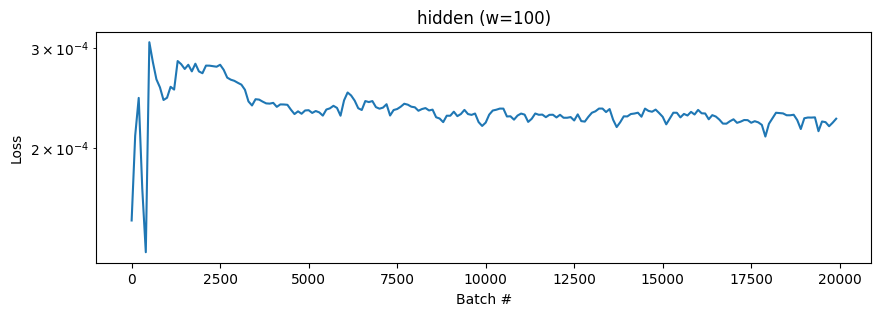

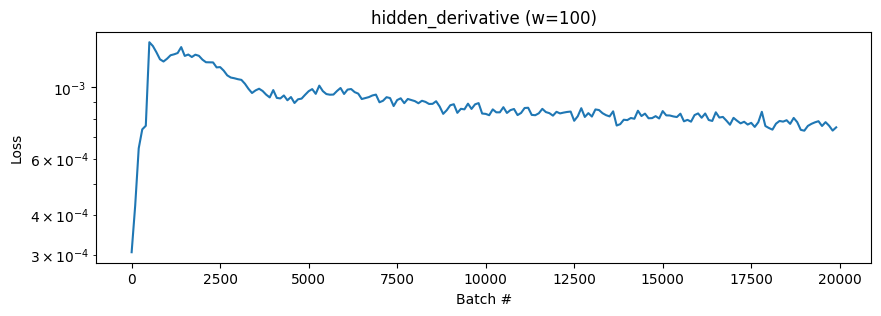

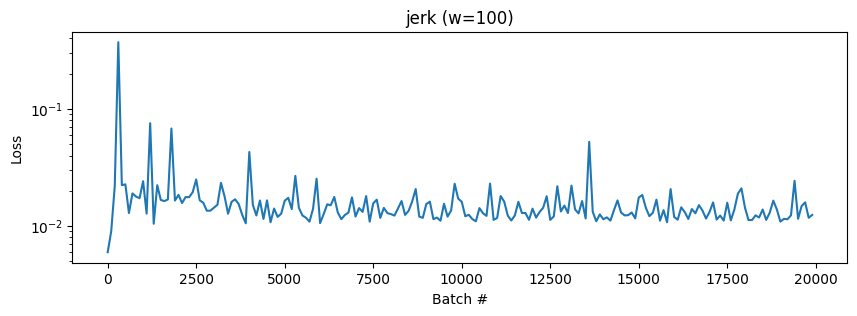

In [3]:
# PLOT LOSS FUNCTION(s)

log = json.load(open(model_name + "_log.json",'r'))
print(log["losses"].keys())
w=100
for loss in log["losses"].keys():
    fig,ax = plot_training_log(log=log["losses"],loss_type=loss, w=w)
    ax.set_title(f"{loss} (w={w})")


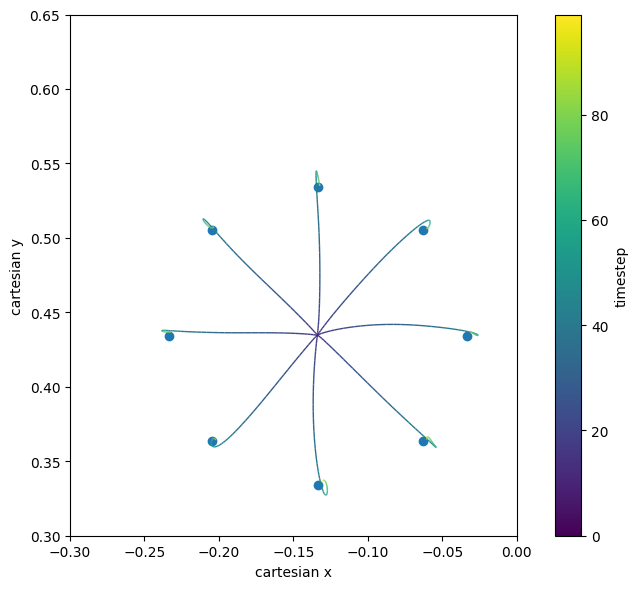

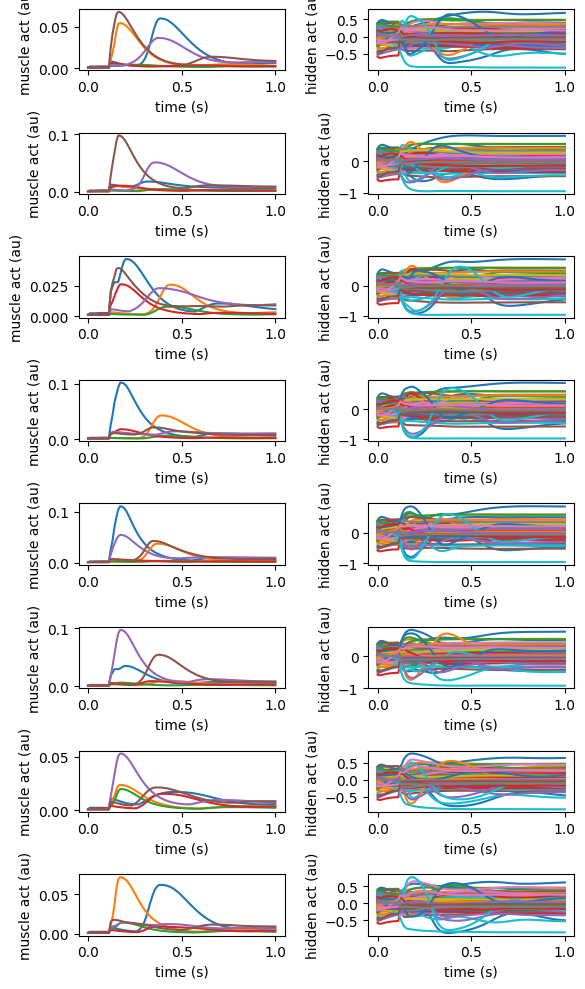

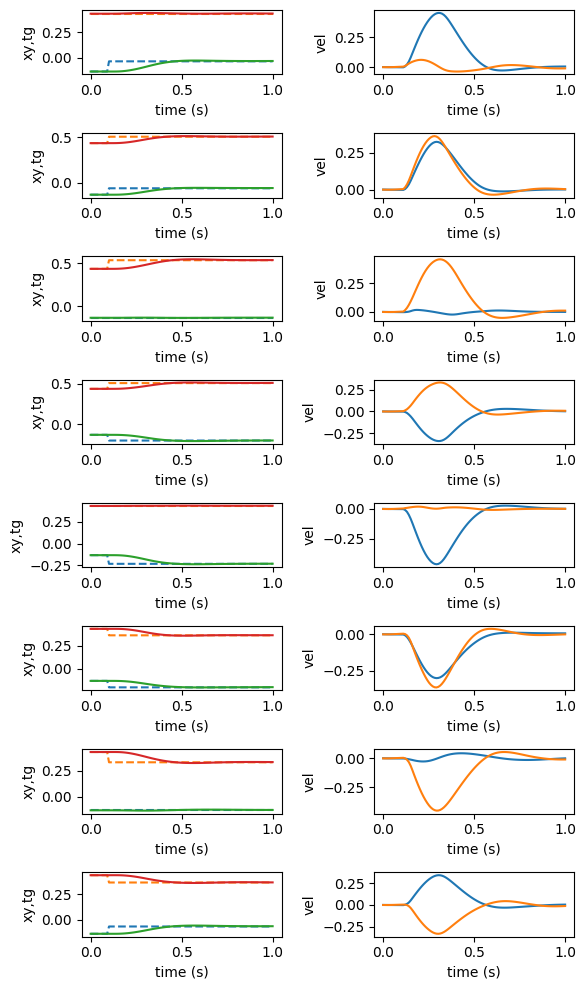

In [4]:
# TEST NETWORK ON CENTRE-OUT

data, losses = test(model_name + "_cfg.json", model_name + "_weights")

fig, ax = plot_simulations(xy=data['xy'], target_xy=data['tg'], figsize=(8,6))
fig, ax = plot_activation(data['all_hidden'], data['all_muscle'])
fig, ax = plot_kinematics(all_xy=data["xy"], all_tg=data["tg"], all_vel=data["vel"])

In [5]:
losses

{'position': tensor(0.0289),
 'muscle': tensor(0.0046),
 'muscle_derivative': tensor(0.),
 'hidden': tensor(0.0002),
 'hidden_derivative': tensor(0.0007),
 'jerk_loss': tensor(0.0013)}